In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# from api_keys import api_key
from api_keys import api_key

from citipy import citipy

output = "output_data/cities.csv"

lat_range = (-90, 90)
lng_range = (-180, 180)



In [3]:
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


596

In [4]:
#SETUP Query URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
cities

query_url =  f"{url}appid={api_key}&units={units}&q="

In [5]:
# use iterrows to iterate through pandas dataframe
citylist = []
lat = []          
lng = []             
maxtemp = []       
humidity = []       
cloudiness = []      
windspeed = []   
country  = []        
date  = []   

count = 0
set_ = 1
print("-------------------") 
print("Beginning Data Retrieval") 
print("-------------------") 
for city in cities:
    try:
        response= requests.get(query_url + city).json()
        lat.append(response["coord"]["lat"])       
        lng.append(response["coord"]["lon"])
        maxtemp.append(response["main"]["temp_max"])       
        humidity.append(response["main"]["humidity"])    
        cloudiness.append(response["clouds"]["all"])     
        windspeed.append(response["wind"]["speed"]) 
        country.append(response["sys"]["country"])      
        date.append(response["dt"]) 
        if  count  > 48:
            count = 1
            set_ = set_ + 1
            citylist.append(city)
        else:
            count = count + 1
            citylist.append(city)
            
        print(f"Processing Record {count} of Set {set_} | {city}")

        
    except (KeyError, IndexError):
        print("City not found. Skipping...")
        
print("-------------------") 
print("Data Retrieval Complete") 
print("-------------------") 


-------------------
Beginning Data Retrieval
-------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | cape town
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | west wendover
Processing Record 5 of Set 1 | kruisfontein
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | kingman
Processing Record 8 of Set 1 | tilichiki
Processing Record 9 of Set 1 | saskylakh
Processing Record 10 of Set 1 | cidreira
Processing Record 11 of Set 1 | castro
Processing Record 12 of Set 1 | atuona
Processing Record 13 of Set 1 | qaanaaq
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | mattru
Processing Record 16 of Set 1 | yar-sale
Processing Record 17 of Set 1 | antalaha
City not found. Skipping...
Processing Record 18 of Set 1 | jamestown
Processing Record 19 of Set 1 | khatanga
Processing Record 20 of Set 1 | nyurba
City not found. Skipping...
Processing Record 21 of Set 1 | vila velha
Processing Record 2

City not found. Skipping...
City not found. Skipping...
Processing Record 37 of Set 4 | olafsvik
Processing Record 38 of Set 4 | viedma
Processing Record 39 of Set 4 | skjervoy
Processing Record 40 of Set 4 | lasa
Processing Record 41 of Set 4 | joensuu
City not found. Skipping...
Processing Record 42 of Set 4 | diffa
Processing Record 43 of Set 4 | aguilas
Processing Record 44 of Set 4 | chuy
Processing Record 45 of Set 4 | varhaug
Processing Record 46 of Set 4 | ilulissat
Processing Record 47 of Set 4 | kollam
Processing Record 48 of Set 4 | paraiso
Processing Record 49 of Set 4 | yerbogachen
Processing Record 1 of Set 5 | ancud
Processing Record 2 of Set 5 | phalaborwa
Processing Record 3 of Set 5 | karratha
Processing Record 4 of Set 5 | teknaf
Processing Record 5 of Set 5 | puerto narino
Processing Record 6 of Set 5 | evensk
Processing Record 7 of Set 5 | coolum beach
Processing Record 8 of Set 5 | high prairie
Processing Record 9 of Set 5 | beringovskiy
Processing Record 10 of Se

Processing Record 28 of Set 8 | barga
Processing Record 29 of Set 8 | maxixe
Processing Record 30 of Set 8 | jiaocheng
Processing Record 31 of Set 8 | aitape
Processing Record 32 of Set 8 | ahipara
Processing Record 33 of Set 8 | bambanglipuro
Processing Record 34 of Set 8 | kaeo
Processing Record 35 of Set 8 | bolo
Processing Record 36 of Set 8 | dhidhdhoo
Processing Record 37 of Set 8 | safaga
Processing Record 38 of Set 8 | argayash
Processing Record 39 of Set 8 | la grande
Processing Record 40 of Set 8 | bathsheba
Processing Record 41 of Set 8 | begunitsy
Processing Record 42 of Set 8 | omsukchan
Processing Record 43 of Set 8 | sayyan
Processing Record 44 of Set 8 | jiexiu
Processing Record 45 of Set 8 | marzuq
Processing Record 46 of Set 8 | crisan
Processing Record 47 of Set 8 | lagos
City not found. Skipping...
Processing Record 48 of Set 8 | dahod
Processing Record 49 of Set 8 | cayenne
Processing Record 1 of Set 9 | santa isabel do rio negro
City not found. Skipping...
Process

In [6]:
weather_dict = {"City": citylist, 
"Latitude": lat,     
"Longitude": lng,            
"Max Temp": maxtemp,     
"Humidity": humidity,  
"Cloudiness": cloudiness,     
"Windspeed": windspeed,
"Country": country,      
"Date": date }
weather_data = pd.DataFrame(weather_dict)
weather_data.count()

City          544
Latitude      544
Longitude     544
Max Temp      544
Humidity      544
Cloudiness    544
Windspeed     544
Country       544
Date          544
dtype: int64

In [7]:
weather_data.head()
weather = weather_data.to_csv("weatherdata.csv", index = True)

In [9]:
weather_data.describe()

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Windspeed,Date
count,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,5.440000e+02
mean,20.058879,22.389246,70.672426,69.411765,50.090074,7.750809,1.596623e+09
std,33.530378,89.281722,14.465650,23.058647,38.369642,5.053385,6.456547e+01
min,-54.800000,-179.170000,28.400000,3.000000,0.000000,0.090000,1.596623e+09
25%,-8.597500,-53.512500,60.010000,56.000000,8.000000,3.960000,1.596623e+09
50%,22.755000,24.355000,73.015000,76.000000,50.000000,6.930000,1.596623e+09
75%,49.235000,102.540000,80.652500,88.000000,90.000000,10.290000,1.596623e+09
max,78.220000,179.320000,110.980000,100.000000,100.000000,32.770000,1.596623e+09


In [10]:
# HAVE NO CITIES WITH HUMIDITY OVER 100

In [ ]:
lat = weather_data["Latitude"]
temp = weather_data["Max Temp"]
plt.scatter(lat,temp)
plt.title("City Lat vs Max Temps (7/24/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("fig1.png")
plt.show()

In [ ]:
lat = weather_data["Latitude"]
humid = weather_data["Humidity"]
plt.scatter(lat,humid)
plt.title("City Lat vs Humidity (7/24/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("fig2.png")
plt.show()

In [ ]:
lat = weather_data["Latitude"]
cloud = weather_data["Cloudiness"]
plt.scatter(lat,cloud)
plt.title("City Lat vs Cloudiness (7/24/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("fig3.png")
plt.show()

In [ ]:
lat = weather_data["Latitude"]
wind = weather_data["Windspeed"]
plt.scatter(lat,wind)
plt.title("City Lat vs Windspeed (7/24/20)")
plt.xlabel("Latitude")
plt.ylabel("Windspeed (mph)")
plt.savefig("fig4.png")
plt.show()


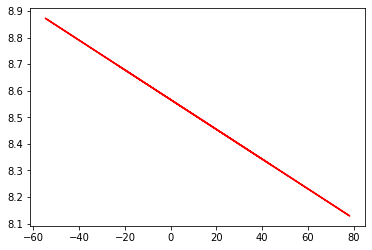

In [18]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat,wind)
regress = lat*slope + intercept
plt.plot(lat, regress, "r-")

In [19]:
northern = weather_data.loc[weather_data["Latitude"] > 0, :]
northern

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
1,evensk,61.95,159.23,49.26,89,0,2.68,RU,1595694617
3,jiayuguan,39.82,98.30,74.21,19,0,10.58,CN,1595694618
4,saint-francois,46.42,3.91,87.80,27,85,3.36,FR,1595694618
6,nemuro,43.32,145.57,56.32,90,35,4.45,JP,1595694618
8,san policarpo,12.18,125.51,82.20,80,20,3.31,PH,1595694619
...,...,...,...,...,...,...,...,...,...
549,kamaishi,39.27,141.88,68.61,90,100,5.35,JP,1595694758
550,vagur,61.47,-6.81,52.99,93,100,33.11,FO,1595694758
551,minsk,53.90,27.57,64.40,88,40,8.95,BY,1595694505
552,thinadhoo,0.53,72.93,82.58,70,100,7.83,MV,1595694758


In [20]:
southern = weather_data.loc[weather_data["Latitude"] < 0, :]
southern

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
0,rikitea,-23.12,-134.97,69.42,80,21,22.21,PF,1595694617
2,caravelas,-17.71,-39.25,78.13,68,61,8.21,BR,1595694617
5,ushuaia,-54.80,-68.30,28.40,92,75,17.22,AR,1595694618
7,mahebourg,-20.41,57.70,68.00,60,75,12.75,MU,1595694619
9,morada nova,-5.11,-38.37,92.39,33,76,7.58,BR,1595694619
...,...,...,...,...,...,...,...,...,...
544,kieta,-6.22,155.63,76.42,86,100,0.81,PG,1595694756
545,manggar,-2.88,108.27,80.35,77,86,14.07,ID,1595694757
547,vanimo,-2.67,141.30,79.70,80,100,3.18,PG,1595694757
553,waitati,-45.75,170.57,46.99,64,3,1.01,NZ,1595694759


The r-squared is: 0.4801780108876275


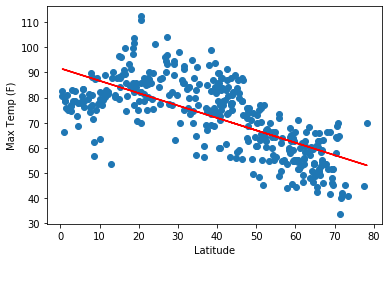

In [21]:
maxtempn = northern["Max Temp"]
latn = northern["Latitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(latn,maxtempn)
regress = latn*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(latn,maxtempn)
plt.plot(latn, regress, "r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.ylabel("Max Temp (F)")
plt.xlabel("Latitude")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.6374442733832496


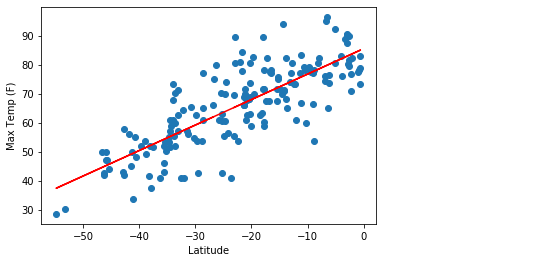

In [22]:
maxtemps = southern["Max Temp"]
lats = southern["Latitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(lats,maxtemps)
regress = lats*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(lats,maxtemps)
plt.plot(lats, regress, "r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.ylabel("Max Temp (F)")
plt.xlabel("Latitude")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.002986781047547288


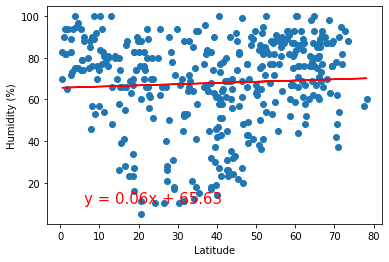

In [23]:
humidityn = northern["Humidity"]
latn = northern["Latitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(latn,humidityn)
regress = latn*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(latn,humidityn)
plt.plot(latn, regress, "r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.009749613879142333


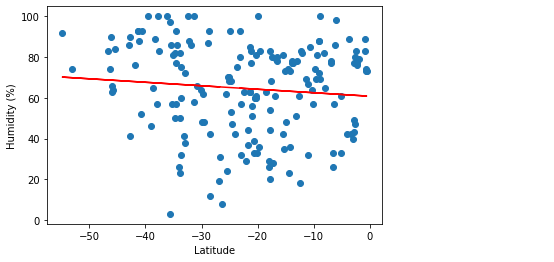

In [24]:
humiditys = southern["Humidity"]
lats = southern["Latitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(lats,humiditys)
regress = lats*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(lats,humiditys)
plt.plot(lats, regress, "r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.006750290441963487


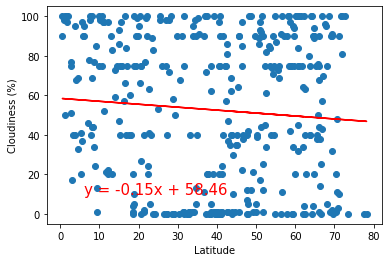

In [25]:
cloudn = northern["Cloudiness"]
latn = northern["Latitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(latn,cloudn)
regress = latn*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(latn,cloudn)
plt.plot(latn, regress, "r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.015585604313047412


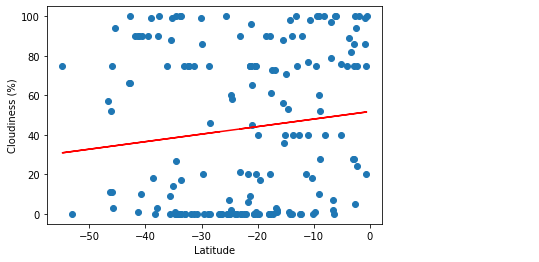

In [26]:
humiditys = southern["Cloudiness"]
lats = southern["Latitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(lats,humiditys)
regress = lats*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(lats,humiditys)
plt.plot(lats, regress, "r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.013812573548259946


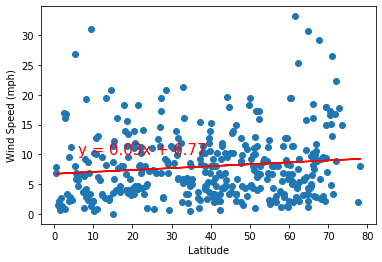

In [27]:
windn = northern["Windspeed"]
latn = northern["Latitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(latn,windn)
regress = latn*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(latn,windn)
plt.plot(latn, regress, "r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.012569667677813447


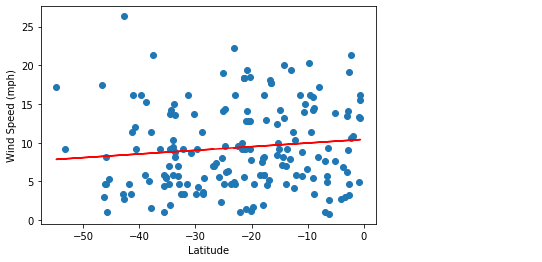

In [28]:
windn = southern["Windspeed"]
latn = southern["Latitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(latn,windn)
regress = latn*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(latn,windn)
plt.plot(latn, regress, "r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
print(f"The r-squared is: {rvalue**2}")
plt.show()